In [1]:
%load_ext autoreload
%autoreload 2

In [89]:
import os
import random
import h5py
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import jax
import jax.numpy as np
import fk
import numpy as onp

In [85]:
root = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/"

In [86]:
name = root + "train_dev_set/spiral_params3.hdf5"

In [26]:
interval = 100  #ms

with h5py.File(name, "r") as file:
    states = file["states"][::interval, 2]
    print(file["states"].shape)
    print(states.shape)

(2000, 3, 1200, 1200)
(20, 1200, 1200)


(1200, 1200)


In [76]:
def show3d(state, rcount=200, ccount=200, zlim=None, figsize=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection="3d")
    r = list(range(0, len(state)))
    x, y = np.meshgrid(r, r)
    plot = ax.plot_surface(x, y, state, rcount=rcount, ccount=ccount, cmap="magma")
    cbar = fig.colorbar(plot)
    cbar.set_label("mV", rotation=0)
    if zlim is not None:
        ax.set_zlim3d(zlim[0], zlim[1])
    ax.set_xlabel("x [mm]")
    ax.set_ylabel("y [mm]")
    ax.set_zlabel("Voltage [mV]")
    ax.set_xticks([7, 7])
    fig.tight_layout()
    return fig, ax

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f557d8f1b90>)

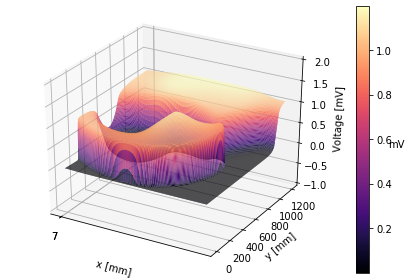

In [77]:
show3d(state, zlim=(-1, 2))

In [116]:
def animate3d(states, times=None, figsize=None, channel=None):
    backend = matplotlib.get_backend()
    matplotlib.use("nbAgg")
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection="3d")
    r = list(range(0, len(state)))
    x, y = np.meshgrid(r, r)
    
    def init():
        plot = ax.plot_surface(x, y, state, rcount=200, ccount=200, cmap="magma")
        cbar = fig.colorbar(plot)
        cbar.set_label("mV", rotation=0)
        ax.set_zlim3d(-1, 2)
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("y [mm]")
        ax.set_zlabel("Voltage [mV]")
        ax.set_xticks([7, 7])
        fig.tight_layout()
        return [plot]

    def update(iteration):
        print("Rendering {}\t".format(iteration + 1), end="\r")
        plot = ax.plot_surface(x, y, state, rcount=200, ccount=200, cmap="magma")        
        if times is not None:
            ax.set_title("t: %d" % times[iteration])
        return [plot]

    animation = FuncAnimation(fig, update, frames=range(len(states)), init_func=init, blit=True)
    matplotlib.use(backend)
    return HTML(animation.to_html5_video())

<IPython.core.display.Javascript object>

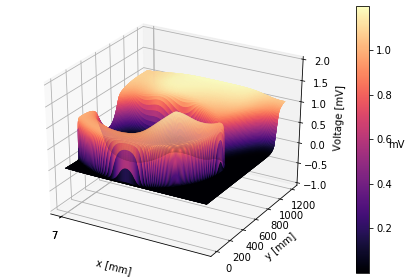

In [118]:
animate3d(states)